### Exercise 1.7: Trajectory of a shot 

Modify your code so that the 2d trajectory of an object can be computed,
and graphs of $y$ as a function of $x$ can be made.

1.  As a check on your program, first neglect the effect of air
    resistance so that you an compare to known results. Supouse that the
    object is thrown and $t_0$ with an angle $\theta _0$ with an initial
    velocity $v_0=15$m/s. Vary $\theta_0$ and show that the maximum
    range occurs at $\theta_0=45^{\circ}$ Compare your result with the
    exact value $v_0^2/g$

2.  Consider the effects of air resistance. Compute the maximum range,
    and the corresponding angle using $k/m=0.1$, $v_0=30$m/s.



In [1]:
class particle2(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt

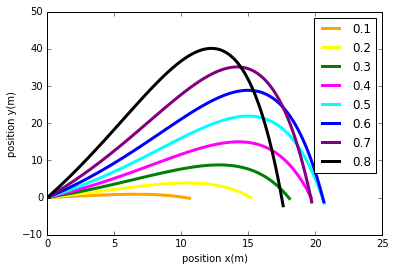

In [21]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

m = 1.
g = 9.8            # g acceleration
v0 = 30.           # initial velocity
k = 0.1 * m
dt = 0.1           # time step

colors = ['red','orange','yellow','green','magenta','cyan','blue','purple','black']
angles = []
max_ranges = []

for angle in range(1,9):
    x = [0]                                  # we need to initialize the arrays for each value of the angle
    y = [0]
    vx = [math.cos(angle*0.1*math.pi/2.)*v0] 
    vy = [math.sin(angle*0.1*math.pi/2.)*v0] 
    t = [0.]

    p = particle2(m, 0., 0., vx[0], vy[0])
    while p.y >= 0.:
        fx = -k * p.vx * abs(p.vx)
        fy = -m * g
        p.euler(fx, fy, dt)
        x.append(p.x)
        y.append(p.y)
        vx.append(p.vx)
        vy.append(p.vy)
        t.append(t[-1]+dt)
    
    angles.append(angle*0.1*90.)
    max_ranges.append(x[-1])

    my_plot = pyplot.plot(x, y, color=(colors[angle]), ls='-', lw=3, label = str(angle*0.1))
    pyplot.legend()

pyplot.xlabel('position x(m)')
pyplot.ylabel('position y(m)');

max range: 20.6787713666 at angle: 45.0


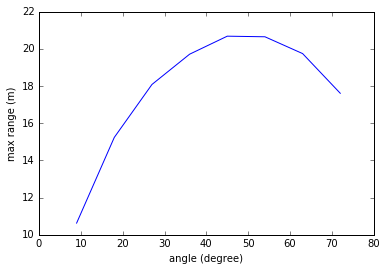

In [25]:
pyplot.plot(angles,max_ranges)
pyplot.xlabel('angle (degree)')
pyplot.ylabel('max range (m)');

ind = max_ranges.index(max(max_ranges))
print "max range:", max_ranges[ind], "at angle:", angles[ind]